In [2]:
!chcp 65001

Active code page: 65001


Sampling Frequency: 16000 [Hz]
Sample Size: 2 [Byte]
Number of Channels: 1
Number of Samples: 51040


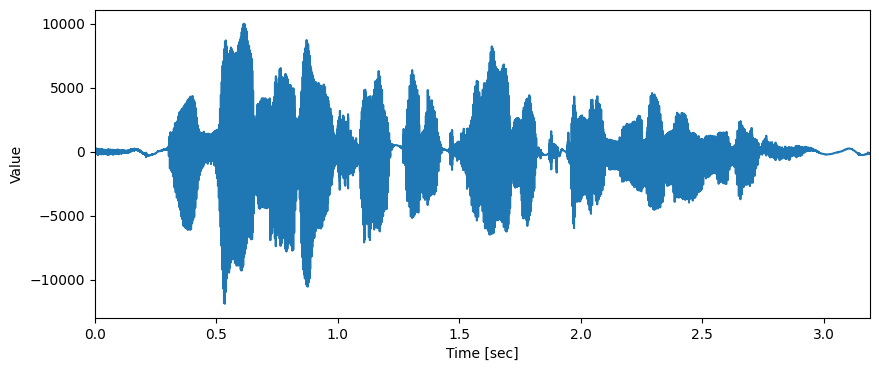

In [2]:
# -*- coding: utf-8 -*-

# wav 데이터를 읽기 위한 모듈(wave)를 import한다.
import wave

# 수치 연산용 모듈(numpy)을 import한다.
import numpy as np

# plot용 모듈(matplotlib)을 import 한다
import matplotlib.pyplot as plt

if __name__ == "__main__":
    # wav 파일 열기
    wav_file = '../../data/wav/BASIC5000_0001.wav'

    # 파형을 출력하는 파일(png 파일)
    out_plot = './plot.png'

    # wav 파일을 열고 이후 처리를 진행한다.
    with wave.open(wav_file) as wav:
        # 샘플링 주파수 [Hz] 확인
        sampling_frequency = wav.getframerate()

        # 샘플 사이즈 [Byte] 확인
        sample_size = wav.getsampwidth()

        # 채널 수 확인
        num_channels = wav.getnchannels()

        # wav 데이터 샘플 수 확인
        num_samples = wav.getnframes()

        # wav 데이터 읽기
        waveform = wav.readframes(num_samples)

        # 읽어들인 데이터는 바이너리 값(16bit integer)
        # 이므로 수치(정수)로 변환한다
        waveform = np.frombuffer(waveform, dtype=np.int16)

    # 읽어온 wav 파일의 정보 표시하기
    print("Sampling Frequency: %d [Hz]" % sampling_frequency)
    print("Sample Size: %d [Byte]" % sample_size)
    print("Number of Channels: %d" % num_channels)
    print("Number of Samples: %d" % num_samples)

    # 횡축(시간축) 생성하기
    time_axis = np.arange(num_samples) / sampling_frequency

    # 시각화 영역 생성
    plt.figure(figsize=(10,4))

    # 파형 그리기
    plt.plot(time_axis, waveform)

    # 횡축과 종축 라벨값 정의
    plt.xlabel("Time [sec]")
    plt.ylabel("Value")

    # 횡축 표시영역을 0에서 파형 종료 시각으로 제한
    plt.xlim([0, num_samples / sampling_frequency])

    # Plot 저장하기
    # plt.savefig(out_plot)

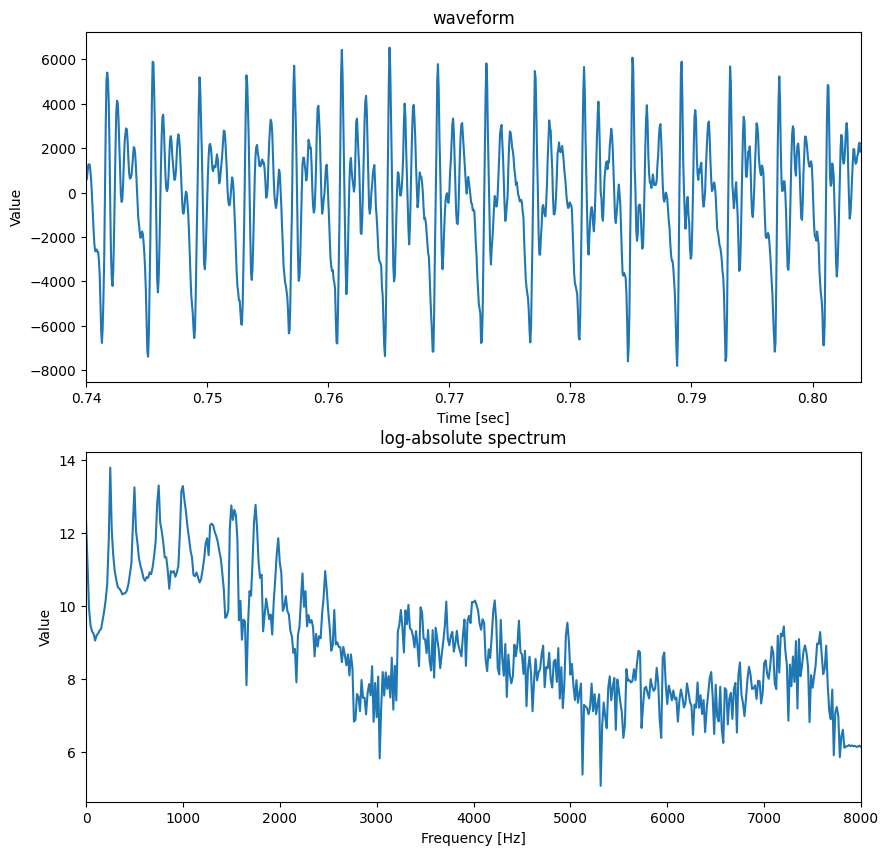

In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # wav 파일 열기
    wav_file = '../../data/wav/BASIC5000_0001.wav'

    # 분석 시각.BASIC5000_0001.wav에서는
    # 아래 시각에 음소"o"fmf qkfghkgksek
    # target_time = 0.58
    target_time = 0.74

    # FFT(고속 푸리에 변환)한 범위의 샘플 수
    # 2의 제곱수여야 한다
    fft_size = 1024

    # 시각화 결과 파일(png 파일)
    out_plot = './spectrum.png'
    
    # wav 파일을 열고, 아래 코드들을 수행한다
    with wave.open(wav_file) as wav:
        # 샘플링 주파수[Hz] 확인
        sampling_frequency = wav.getframerate()
        # wav 데이터 읽기
        waveform = wav.readframes(wav.getnframes())
        # 읽어온 데이터는 바이너리 값(16bit integer)이므로
        # 수치(정수)로 변환한다
        waveform = np.frombuffer(waveform, dtype=np.int16)

    # 분석 시각을 샘플 번호로 변환
    target_index = int(target_time * sampling_frequency)
    # FFT를 실행하는 구간만큼의 파형데이터를 도출한다
    frame = waveform[target_index: target_index + fft_size]
    # FFT 적용
    spectrum = np.fft.fft(frame)
    # 진폭 스펙트럼 확인
    absolute = np.abs(spectrum)
    # 진폭 스펙트럼은 좌우 대칭이므로 좌측 반만 이용한다
    absolute = absolute[:int(fft_size / 2) + 1]
    # 로그 함수를 취하고, 로그 진폭 스펙트럼 계산
    log_absolute = np.log(absolute + 1E-7)

    # 시간 파형과 로그 진폭 스펙트럼을 시각화한다
    # 시각화 영역 생성
    plt.figure(figsize=(10, 10))
    # 그림 영역을 종으로 2분할하여,
    # 위쪽에 시간 파형을 그린다
    plt.subplot(2, 1, 1)

    # 횡축(시간축) 생성하기
    time_axis = target_time \
        + np.arange(fft_size) / sampling_frequency

    # 파형 그리기
    plt.plot(time_axis, frame)

    # 횡축과 종축 라벨값 정의
    plt.title('waveform')
    plt.xlabel("Time [sec]")
    plt.ylabel("Value")

    # 횡축 표시영역을 0에서 파형 종료 시각으로 제한
    # plt.xlim([0, num_samples / sampling_frequency])
    plt.xlim([target_time, 
              target_time + fft_size / sampling_frequency])

    # 2분할한 그림 영역 밑에
    # 로그 진폭 스펙트럼을 그린다
    plt.subplot(2, 1, 2)
    # 횡축(주파수 축) 생성
    freq_axis = np.arange(int(fft_size / 2) + 1) \
        * sampling_frequency / fft_size
    # 로그 진폭 스펙트럼 시각화
    plt.plot(freq_axis, log_absolute)
    # 시각화한 그림의 제목과 횡축, 종축 라벨 정의
    plt.title('log-absolute spectrum')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Value')
    # 횡축 표시 영역을 0 ~ 최대 주파수로 제한
    plt.xlim([0, sampling_frequency / 2])

    # 시각화된 결과물 저장
    # plt.savefig(out_plot)